In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
PATH_EX2 = '../../ex02/template'
import sys
sys.path.insert(1, PATH_EX2)
from grid_search import grid_search, generate_w, get_best_parameters
from gradient_descent import gradient_descent
from costs import compute_loss

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = npl.solve(np.dot(tx.T, tx), np.dot(tx.T, y))
    N = y.size
    e = y - np.dot(tx, w)
    mse = npl.norm(e)**2 / (2*N)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [35]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    loss_least_squares, w_least_squares = least_squares(y, tx)
    
    w0, w1 = generate_w(100)
    loss_grid_search, w0f, w1f = get_best_parameters(w0, w1, grid_search(y, tx, w0, w1))
    w_grid_search = [w0f, w1f]

    loss_gradient_descent, w_gradient_descent = gradient_descent(y, tx, [0, 0], 50, 0.7)
    loss_ridge, w_ridge = ridge_regression(y, tx, 0)
    print(w_least_squares, w_grid_search, w_gradient_descent[-1], w_ridge, sep='\n')
    

Test it here

In [36]:
test_your_least_squares()

[73.293922   13.47971243]
[72.72727272727272, 13.636363636363626]
[73.293922   13.47971243]
[73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    if(len(x.shape) == 1):
        x = x[np.newaxis]
    X = x.T ** np.arange(degree+1)
#     X = np.vander(x, degree+1, increasing=True)
    return X    

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [8]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        X = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, X)
        rmse = (2*mse)**0.5

        print("Processing {i}th experiment, degree={d}, rmse={loss}, mse={mse}".format(
              i=ind + 1, d=degree, loss=rmse, mse=mse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874, mse=0.11133351726547978
Processing 2th experiment, degree=3, rmse=0.2585827766773748, mse=0.03343252619709054
Processing 3th experiment, degree=7, rmse=0.24965870360907552, mse=0.03116473414388211
Processing 4th experiment, degree=12, rmse=0.24328247481248677, mse=0.02959318127544413


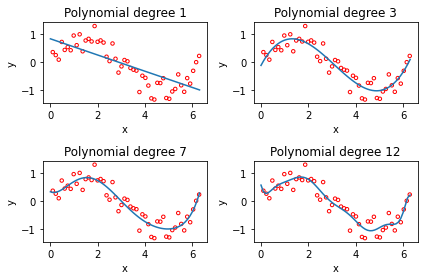

In [9]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
k = np.random.permutation(5)
k

array([4, 3, 0, 1, 2])

In [11]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    N = x.size
    k = np.random.permutation(N)
    x = np.take(x, k)
    y = np.take(y, k)
    sep = int(N*ratio)
    x_train, y_train = x[0:sep], y[0:sep]
    x_test, y_test = x[sep:], y[sep:]
    return x_train, y_train, x_test, y_test

Then, test your `split_data` function below.

In [12]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    X_train = build_poly(x_train, degree)
    X_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    mse, w = least_squares(y_train, X_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = (2*mse)**0.5
    rmse_te = npl.norm(y_test - X_test @ w, 2) / y_test.size**0.5

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [13]:
seed = 90
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.484, Testing RMSE=0.360
proportion=0.9, degree=3, Training RMSE=0.270, Testing RMSE=0.113
proportion=0.9, degree=7, Training RMSE=0.259, Testing RMSE=0.159
proportion=0.9, degree=12, Training RMSE=0.249, Testing RMSE=0.219
proportion=0.5, degree=1, Training RMSE=0.444, Testing RMSE=0.508
proportion=0.5, degree=3, Training RMSE=0.275, Testing RMSE=0.257
proportion=0.5, degree=7, Training RMSE=0.261, Testing RMSE=0.247
proportion=0.5, degree=12, Training RMSE=0.217, Testing RMSE=0.879
proportion=0.1, degree=1, Training RMSE=0.188, Testing RMSE=0.544
proportion=0.1, degree=3, Training RMSE=0.062, Testing RMSE=0.353
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=0.330
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=0.371


# 3 Ridge Regression
Please fill in the function below.

In [53]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N = y.size
    w = npl.solve(tx.T @ tx + 2*N*lambda_, tx.T @ y)
    e = y - tx @ w
    mse = npl.norm(e, 2)**2 / (2*N)
    return mse, w

In [54]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    X_train = build_poly(x_train, degree)
    X_test = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        mse, w = ridge_regression(y_train, X_train, lambda_)
        rmse_tr.append((2*mse)**0.5)
        e = y_test - X_test @ w
        N = y_test.size
        rmse_te.append(npl.norm(e) / (N**0.5))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.309
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.237, Testing RMSE=0.309
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.237, Testing RMSE=0.308
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.238, Testing RMSE=0.305
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.239, Testing RMSE=0.301
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.245, Testing RMSE=0.299
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.262, Testing RMSE=0.307
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.293, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.193, 

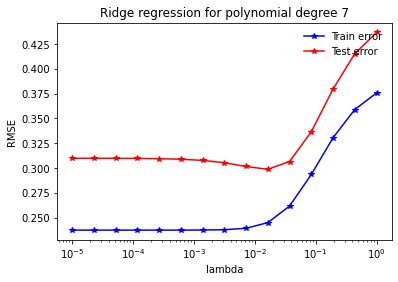

In [74]:
seed = 25
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)